contigs:
    total length: 6680106
    number: 175
    N50:234690
scaffolds:
    total length: 6680116
    number: 174
    N50: 234690
    
N50 is a useful statistic to calculate because it defines assembly quality in terms of contiguity. N50 is more useful than median or mean because it gives a greater weight to the longer contigs. This statistic can help quantify quality of a contig.

In our assembly, the scaffolds have an average length of 38391.47 and the contigs have an average length of 38172.03, so the scaffolds are slightly longer (~200 base pairs longer) than the contigs. 

In [2]:
from Bio import SeqIO
x=0
coverage=[]
with open("contigs-Copy1.fasta", "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        coverage.append(float(record.id[record.id.find('cov')+4:record.id.find('cov')+10]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


This cell above parses the contigs.fasta file, and then extracts the coverage from the header in the fasta file, and stores it in the variable "coverage"

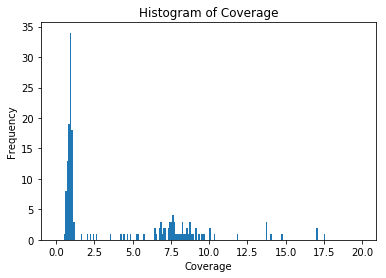

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.hist(coverage,np.arange(0,20,.1))
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.title('Histogram of Coverage')
plt.show()

The coverage is NOT uniformly distributed. It looks to be a bimodal distribution, with peaks around 1 and around 7.5. The presence of contigs with coverage an integer multiple of the mean coverage can be explained by multiple reads of the same sequence that are used to create the contig. Having multiple reads of the same sequence will lead to an integer multiple increase of the coverage of that contig.

# Lines entered into Terminal
be131-06@meowth:~/Neil/Lab9 rna_hmm3.py -i spades_out/contigs.fasta -o output.gff


be131-06@meowth:~/Neil/Lab9 bedtools getfasta -fi spades_out/contigs.fasta -bed output.gff

>NODE_23_length_103366_cov_10.070032:35530-37075
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

>NODE_17_length_154231_cov_9.579901:124541-126086
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

>NODE_6_length_298782_cov_8.920390:13925-15470
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

>NODE_5_length_332503_cov_9.111103:137011-138556
TCGATTAAGGAGGTGATCCAGCCGCAGGTTCCCCTACGGCTACCTTGTTACGACTTCACCCCAGTCATGAATCACACCGTGGTAACCGTCCTCCCGAAGGTTAGACTAGCTACTTCTGGTGCAACCCACTCCCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGACATTCTGATTCGCGATTACTAGCGATTCCGACTTCACGCAGTCGAGTTGCAGACTGCGATCCGGACTACGATCGGTTTTCTGGGATTAGCTCCACCTCGCGGCTTGGCAACCCTCTGTACCGACCATTGTAGCACGTGTGTAGCCCAGGCCGTAAGGGCCATGATGACTTGACGTCATCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCCTTAGAGTGCCCACCATTACGTGCTGGTAACTAAGGACAAGGGTTGCGCTCGTTACGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAGCCATGCAGCACCTGTCTCAATGTTCCCGAAGGCACCAATCCATCTCTGGAAAGTTCATTGGATGTCAAGGCCTGGTAAGGTTCTTCGCGTTGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCATTTGAGTTTTAACCTTGCGGCCGTACTCCCCAGGCGGTCAACTTAATGCGTTAGCTGCGCCACTAAGAGCTCAAGGCTCCCAACGGCTAGTTGACATCGTTTACGGCGTGGACTACCAGGGTATCTAATCCTGTTTGCTCCCCACGCTTTCGCACCTCAGTGTCAGTATCAGTCCAGGTGGTCGCCTTCGCCACTGGTGTTCCTTCCTATATCTACGCATTTCACCGCTACACAGGAAATTCCACCACCCTCTACCATACTCTAGCTCGTCAGTTTTGAATGCAGTTCCCAGGTTGAGCCCGGGGATTTCACATCCAACTTAACGAACCACCTACGCGCGCTTTACGCCCAGTAATTCCGATTAACGCTTGCACCCTCTGTATTACCGCGGCTGCTGGCACAGAGTTAGCCGGTGCTTATTCTGTCGGTAACGTCAAAACAATTACGTATTAGGTAACTGCCCTTCCTCCCAACTTAAAGTGCTTTACAATCCGAAGACCTTCTTCACACACGCGGCATGGCTGGATCAGGCTTTCGCCCATTGTCCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGACTGATCATCCTCTCAGACCAGTTACGGATCGTCGCCTTGGTGAGCCATTACCTCACCAACTAGCTAATCCGACCTAGGCTCATCTGATAGCGCAAGGCCCGAAGGTCCCCTGCTTTCTCCCGTAGGACGTATGCGGTATTAGCGTCCGTTTCCGAGCGTTATCCCCCACTACCAGGCAGATTCCTAGGCATTACTCACCCGTCCGCCGCTCTCAAGAGGTGCAAGCACCTCTCTACCGCTCGACTTGCATGTGTTAGGCCTGCCGCCAGCGTTCAATCTGAGCCATGATCAAACTCTTCAGTTCAAA

>NODE_3_length_378948_cov_10.009619:348499-350044
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA

>NODE_1_length_687576_cov_8.342447:46285-47830
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGCCTTGACATCCAATGAACTTTCCAGAGATGGATTGGTGCCTTCGGGAACATTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTGTCCTTAGTTACCAGCACGTAATGGTGGGCACTCTAAGGAGACTGCCGGTGACAAACCGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGGCCTGGGCTACACACGTGCTACAATGGTCGGTACAGAGGGTTGCCAAGCCGCGAGGTGGAGCTAATCCCAGAAAACCGATCGTAGTCCGGATCGCAGTCTGCAACTCGACTGCGTGAAGTCGGAATCGCTAGTAATCGCGAATCAGAATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCACCAGAAGTAGCTAGTCTAACCTTCGGGAGGACGGTTACCACGGTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATCACCTCCTTAATCGA


Node 23- Genus Pseudomonas
Node 17- Genus Pseudomonas
Node 6- Genus Pseudomonas
Node 5- Genus Pseudomonas
Node 3- Genus Pseudomonas
Node 1- Genus Pseudomonas

After running all 6 of these contigs that were identified as 16S rRNA into the RDP's Seq Match tool, I found that these sequences came from a bacteria in the genus Psuedomonas. RDP's Seq Match matched the hypervariable regions of the 16S rRNA in my sequence to the hypervariable region of Psuedomonas.

## Pseudomonas Write Up

The genus of bacteria Pseudomonas is a very adaptable group of bacteria. It lives in soil, water, plants and in animals. Certain species of Pseudomonas are pathogenic to humans and other animals and plants. In the annotated genome, we can see evidence of adaptation for these environments. The annotated Pseudomonas genome has 42 genes for sulfur metabolism, 39 genes for phosphorun metabolism, and 59 genes for nitrogen metabolism. These support the claim that Pseudomonas lives in soil, as these nutrients are commonly found in soil. Furthermore, the annotated genome has 70 flagellar motility genes, which supports the claim that Pseudomonas lives in water, as flagellar motility is important for movement in water. In addition, the annotated genome also contains 62 genes relating to virulence, disease, and defense, supporting the notion that certain Pseudomonas species are pathogenic. 

Within these 62 genes relating to virulence, disease and defense, there 48 genes involving antibiotic resistance. 2 of these genes code for resistance to colocin E2, which is a bacteriocin produced by E. Coli, which acts against neighboring bacteria cells, killing them with its DNase activity. Pseudomonas is naturally antibiotic resistant, with resistance to cobalt-zinc-cadmium, d-cysteine, streptothricin, fluoroquinolones, fosfomycin, and beta lactamase. Furthermore, Pseudomonas has multidrug resistant efflux pumps, which are membrane transporters that transport antibiotic drugs out of the bacteria. These antibiotic resistance genes make Pseudomonas a difficult pathogen to deal with.

Pseudomonas is not particularly virulent, especially in comparison to Staphylococcus aureus and Streptococcus pyogenes. As such, it tends to infect the immunocompromised or those who are suffering from other diseases or conditions. Despite its lack of virulence, its antibiotic resistance, as mentioned previously, make it a relatively serious pathogen to treat. Because it thrives on most surfaces (as it lives naturally in soil or water), and is capable of forming biofilms (found 4 genes in the annotated genome that code for biofilm adhesin synthesis), Pseudomonas can be found in hospitals on medical equipment. The ability to form a biofilm makes it particularly difficult to clean, as these biofilms are particularly hardy. Beyond its pathogenic features, this Pseudomonas genome has some other interesting parts as well.

According to the genes found in the genome annotation, this Pseudomonas is auxotrophic for Valine, meaning it cannot synthesize valine. After searching through the genes annotated, there were genes for biosynthesis of all amino acids except valine. Interestingly, there is a gene for valine degredation, but not biosynthesis. This suggests that this Pseudomonas does not use valine in its native proteins, so it instead digests valine to be converted into other amino acids. For example, Pseudomonas has a valine-pyruvate aminotransferase, which converts L-valine into L-alanine. 

Overall, I was able to find some interesting facts about this Pseudomonas through both genus research and support those facts from genus research with specific genes found in the genome annotation. Attached below is the picture of RAST output. 

## Citations
*The RAST Server: Rapid Annotations using Subsystems Technology.*
Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, Edwards RA, Formsma K, Gerdes S, Glass EM, Kubal M, Meyer F, Olsen GJ, Olson R, Osterman AL, Overbeek RA, McNeil LK, Paarmann D, Paczian T, Parrello B, Pusch GD, Reich C, Stevens R, Vassieva O, Vonstein V, Wilke A, Zagnitko O.
BMC Genomics, 2008

![](RAST.png)